<a href="https://colab.research.google.com/github/zeyyildm/diabet_classifier/blob/main/diabet_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#importlar
import pandas as pd
import numpy as np
import tensorflow as tf
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib as plt

In [27]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
df = pd.read_csv('/content/drive/MyDrive/diabet_classifier/diabetes.csv')
print(df.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

In [29]:
#veriyi tanımak için
df.shape
df.columns
df.info()
df['Outcome'].value_counts()
df['Outcome'].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,proportion
Outcome,
0,0.651042
1,0.348958


In [30]:
#preprocessingten önce bize rehber olur
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
#kolonlarda boş değer gözlemlenmiyor ama 0 gibi geçersiz değerler var. ör: kan basıncı 0 olamaz
#preproccesing
col_fix = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df_fixed = df.copy()

for col in col_fix:
  df_fixed[col] = df_fixed[col].replace(0, np.nan) #0 değerlerini NaN ile değiştirdik

#NaN değerleri medyan ile dolduralım
for col in col_fix:
  df_fixed[col] = df_fixed[col].fillna(df_fixed[col].median())

df_fixed.describe()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
x = df_fixed.drop("Outcome", axis=1) #giriş değerleri belirlendi. diyabet olup olmama dışındaki her şey sonucu belirlemede kullanılacak
y = df_fixed["Outcome"] #hedef diyabet olup olmamayı bulma (0 veya 1)

In [33]:
#datayı test ve train olarak bölme
#%70 train, %15 test, %15 validation olarak ayıracağız
x_train, x_temp, y_train, y_temp = train_test_split(
    x,
    y,
    random_state=42, #her seferinde aynı rastgele değerleri üretsin
    test_size = 0.3,
    stratify = y,
)

#x_train = giriş verileri
#y_train = x_traine karşılık gelen hedef değerler
#x_temp = geriye kalan %30 luk kısım
#y_temp = x_tempe denk gelen hedefler
#test_size = Verinin ne kadarını train dışına ayıracağız
#stratify = sınıf dağılımını korumayı sağlar

In [34]:
#trainden geriye kalan datayı validation ve test olarak böleceğiz
x_val, x_test, y_val, y_test = train_test_split(
    x_temp,
    y_temp,
    random_state = 42,
    stratify = y_temp,
    test_size = 0.5
)

In [35]:
#scaling
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train) #sadece burda fit yapmamızın sebebi model sadece train üzerinden öğrenme(fit) yapabilir

x_val_scaled = scaler.transform(x_val) #buralarda öğrenme olmadan sadece dönüştürme yapabiliriz

x_test_scaled = scaler.transform(x_test)

In [36]:
#katmanları oluşturma
input_dim = x_train_scaled.shape[1] #8 feature olacağını söylüyoruz

model = keras.Sequential([
  layers.Input(shape=(input_dim,)), #sadece 8 özelliği alır, işlem yapmaz, bir kapı gibi
  layers.Dense(32, activation="relu"), #1. gizli katman 32 nöron var. her input için w.x. sonrasında hepsini toplar bias ekler. çıktısı 32 boyutlu olur(çümkü 32 nöron var)
  layers.Dense(16, activation="relu"), #2.gizli katman 16 nöron var. giriş: 32 nöron çıktısı çıkış:16 nöron
  layers.Dense(1, activation="sigmoid")     #çıktı katmanı çıktılar 0 veya 1 olur
])
#sigmoid sayesinde değer 0 ile 1 arasında olur
#RELU: negatifleri siler, modeli non-lineer yapar böylece karmaşık patternler öğrenilebilir. gradient problemiyle ilgilenmez(sigmoidden farkı)
#modeli derleme
model.compile(
    optimizer="adam", #hataya göre ağırlıkları güncellemeye yarayan fonksiyon
    loss="binary_crossentropy", #modelin ne kadar yanlış olduğunu ölçer. gerçek değerle tahmin farkına bakar
    metrics=["accuracy"]
)

In [37]:
#model eğitme
history = model.fit(
    x_train_scaled,
    y_train,
    validation_data=(x_val_scaled, y_val),
    epochs=100,
    batch_size=32
)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5347 - loss: 0.6935 - val_accuracy: 0.5913 - val_loss: 0.6610
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6618 - loss: 0.6351 - val_accuracy: 0.6522 - val_loss: 0.6228
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6662 - loss: 0.6018 - val_accuracy: 0.6609 - val_loss: 0.5923
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7125 - loss: 0.5659 - val_accuracy: 0.6522 - val_loss: 0.5686
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7571 - loss: 0.5357 - val_accuracy: 0.6957 - val_loss: 0.5527
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7641 - loss: 0.5072 - val_accuracy: 0.7043 - val_loss: 0.5386
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7539 - loss: 0.4985 - val_accuracy: 0.7391 - val_loss: 0.5318
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7813 - loss: 0.4727 - val_accuracy: 0.7391 - 

**her epochta:** forward pass)(tahmin yapılır- loss hesabı - backprop(ağırlıklar güncellenir)
**validation set :** overfitting oluyor mu diye bakılır
**nöronlar:** ağırlıkları çarpar - toplar - aktivasyon fonksiyonu uygular - çıktı üretir
**katman:** nöronların aynı anda çalışması
**loss:** modelin ne kadar kötü çalıştığını ölçer
**opimizer:** loss'a göre ağırlıkları günceller hangi özelliğe ne kadar önem verileceğini belirler
**epoch:** data üzerinde tam bir tur atma biz 100 kere dönerek öğrenme sağlayacağız
**batch :** küçük veri parçaları

In [38]:
#model performansını ölçme
test_loss, test_accur = model.evaluate(x_test_scaled, y_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7878 - loss: 0.4482 


In [39]:
print("Train accuracy:", history.history["accuracy"][-1])
print("Validation accuracy:", history.history["val_accuracy"][-1])

test_loss, test_acc = model.evaluate(x_test_scaled, y_test)
print("Test accuracy:", test_acc)


Train accuracy: 0.858473002910614
Validation accuracy: 0.7130434513092041
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7878 - loss: 0.4482 
Test accuracy: 0.7586206793785095


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


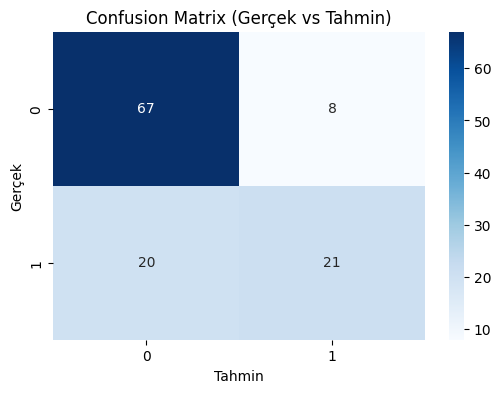

In [43]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred_proba = model.predict(x_test_scaled)
y_pred = (y_pred_proba >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Gerçek vs Tahmin)")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()
